# Проектное задание на зачет

## Шкала оценивания

- **60-79 баллов:** Нужно сделать пункты с 1 по 12 и с 26 по 29

- **80-94 баллов:** Нужно сделать пункты с 1 по 17 и с 26 по 32

- **95-100 баллов:** Нужно сделать пункты с 1 по 25 и с 26 по 33

# Часть I. Разведочный анализ данных для набора данных: Автомобили

## Задание

Вам предлагается выполнить разведочный анализ данных и описать полученные результаты

Описание набора данных: https://archive.ics.uci.edu/dataset/10/automobile

Ссылка на набор данных для использования в блокноте: https://raw.githubusercontent.com/yakushinav/journ/refs/heads/main/datasets/automobile.csv

#### 1. Подключение библиотек

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

#### 2. Чтение набора данных

In [67]:
url = "https://raw.githubusercontent.com/yakushinav/journ/refs/heads/main/datasets/automobile.csv"
df = pd.read_csv(url)

#### 3. Первые 7 строк набора данных

In [68]:
print("Первые 7 строк набора данных:")
df.head(7)

Первые 7 строк набора данных:


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,width,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,64.1,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,64.1,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,65.5,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,66.2,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,66.4,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi
5,15250.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,66.3,177.3,99.8,front,fwd,sedan,2.0,std,gas,audi
6,17710.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,71.4,192.7,105.8,front,fwd,sedan,4.0,std,gas,audi


#### 4. Последние 5 строк набора данных

In [69]:
print("Последние 5 строк набора данных:")
df.tail()

Последние 5 строк набора данных:


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,width,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,68.9,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,68.8,188.8,109.1,front,rwd,sedan,4.0,turbo,gas,volvo
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,68.9,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,68.9,188.8,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo
204,22625.0,25,19,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,68.9,188.8,109.1,front,rwd,sedan,4.0,turbo,gas,volvo


#### 5. Поля набора данных

In [70]:
print("Поля набора данных:")
print(df.columns.tolist())

Поля набора данных:
['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower', 'compression-ratio', 'stroke', 'bore', 'fuel-system', 'engine-size', 'num-of-cylinders', 'engine-type', 'curb-weight', 'height', 'width', 'length', 'wheel-base', 'engine-location', 'drive-wheels', 'body-style', 'num-of-doors', 'aspiration', 'fuel-type', 'make']


#### 6. Размер набора данных (количество полей и строк)

In [71]:
print(f"Размер набора данных: {df.shape}")
print(f"Количество строк: {df.shape[0]}")
print(f"Количество полей: {df.shape[1]}")

Размер набора данных: (205, 24)
Количество строк: 205
Количество полей: 24


#### 7. Опишите поля набора данных в формате: название поля, тип данных, назначение поля

In [72]:
print("Описание полей набора данных:")
field_info = []
for column in df.columns:
    dtype = str(df[column].dtype)
    purpose = "Неизвестно"
    if 'price' in column.lower():
        purpose = "Целевая переменная - цена автомобиля"
    elif 'mpg' in column.lower() or 'consumption' in column.lower():
        purpose = "Экономичность расхода топлива"
    elif 'engine' in column.lower() or 'cylinders' in column.lower():
        purpose = "Характеристики двигателя"
    elif 'horsepower' in column.lower() or 'power' in column.lower():
        purpose = "Мощность двигателя"
    elif 'weight' in column.lower():
        purpose = "Вес автомобиля"
    elif 'size' in column.lower() or 'length' in column.lower() or 'width' in column.lower():
        purpose = "Габаритные размеры"
    elif 'make' in column.lower() or 'model' in column.lower():
        purpose = "Производитель и модель"
    elif 'fuel' in column.lower():
        purpose = "Тип топлива"
    elif 'aspiration' in column.lower():
        purpose = "Тип впуска воздуха"
    elif 'body' in column.lower():
        purpose = "Тип кузова"
    elif 'drive' in column.lower():
        purpose = "Тип привода"

    field_info.append((column, dtype, purpose))

for field in field_info:
    print(f"{field[0]} | {field[1]} | {field[2]}")

Описание полей набора данных:
price | float64 | Целевая переменная - цена автомобиля
highway-mpg | int64 | Экономичность расхода топлива
city-mpg | int64 | Экономичность расхода топлива
peak-rpm | float64 | Неизвестно
horsepower | float64 | Мощность двигателя
compression-ratio | float64 | Неизвестно
stroke | float64 | Неизвестно
bore | float64 | Неизвестно
fuel-system | object | Тип топлива
engine-size | int64 | Характеристики двигателя
num-of-cylinders | int64 | Характеристики двигателя
engine-type | object | Характеристики двигателя
curb-weight | int64 | Вес автомобиля
height | float64 | Неизвестно
width | float64 | Габаритные размеры
length | float64 | Габаритные размеры
wheel-base | float64 | Неизвестно
engine-location | object | Характеристики двигателя
drive-wheels | object | Тип привода
body-style | object | Тип кузова
num-of-doors | float64 | Неизвестно
aspiration | object | Тип впуска воздуха
fuel-type | object | Тип топлива
make | object | Производитель и модель


#### 8. Информация о наборе данных

In [73]:
print("Информация о наборе данных:")
print(df.info())

Информация о наборе данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16

#### 9. Проверка наличия пропусков в данных

In [74]:
print("Пропуски в данных:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

Пропуски в данных:
price           4
peak-rpm        2
horsepower      2
stroke          4
bore            4
num-of-doors    2
dtype: int64


#### 10. Если вы обнаружили пропуски в данных, то удалите их

In [75]:
print(f"Размер данных до удаления пропусков: {df.shape}")
df_clean = df.dropna()
print(f"Размер данных после удаления пропусков: {df_clean.shape}")
print(f"Удалено строк: {df.shape[0] - df_clean.shape[0]}")

Размер данных до удаления пропусков: (205, 24)
Размер данных после удаления пропусков: (193, 24)
Удалено строк: 12


#### 11. Проведите предобработку текстовых данных: удаление символов, лемматизация, стоп слова, перевод в нижний регистр

In [76]:
df_processed = df_clean.copy()

text_columns = df_processed.select_dtypes(include=['object']).columns

for col in text_columns:
    df_processed[col] = df_processed[col].str.lower().str.strip()

print("Пример обработанных текстовых данных:")
print(df_processed[text_columns].head())

Пример обработанных текстовых данных:
  fuel-system engine-type engine-location drive-wheels   body-style  \
0        mpfi        dohc           front          rwd  convertible   
1        mpfi        dohc           front          rwd  convertible   
2        mpfi        ohcv           front          rwd    hatchback   
3        mpfi         ohc           front          fwd        sedan   
4        mpfi         ohc           front          4wd        sedan   

  aspiration fuel-type         make  
0        std       gas  alfa-romero  
1        std       gas  alfa-romero  
2        std       gas  alfa-romero  
3        std       gas         audi  
4        std       gas         audi  


#### 12. Фильтрация. Выберите все строки таблицы, для которых значение поля bore больше 3.0

In [77]:
bore_filtered = df_processed[df_processed['bore'] > 3.0]
print(f"Количество строк с bore > 3.0: {len(bore_filtered)}")
bore_filtered[['make', 'bore']].head()

Количество строк с bore > 3.0: 170


,make,bore
0,alfa-romero,3.47
1,alfa-romero,3.47
3,audi,3.19
4,audi,3.19
5,audi,3.19


#### 13. Фильтрация. Выберите все строки таблицы, для которых значение поля aspiration равно std

In [78]:
aspiration_filtered = df_processed[df_processed['aspiration'] == 'std']
print(f"Количество строк с aspiration = 'std': {len(aspiration_filtered)}")
aspiration_filtered[['make', 'aspiration']].head()

Количество строк с aspiration = 'std': 158


,make,aspiration
0,alfa-romero,std
1,alfa-romero,std
2,alfa-romero,std
3,audi,std
4,audi,std


#### 14. Фильтрация. Выберите все строки таблицы, для которых значение поля fuel-type равно gas и значение поля make равно toyota

In [79]:
fuel_make_filtered = df_processed[(df_processed['fuel-type'] == 'gas') & (df_processed['make'] == 'toyota')]
print(f"Количество Toyota с бензиновым двигателем: {len(fuel_make_filtered)}")
fuel_make_filtered[['make', 'fuel-type']].head()

Количество Toyota с бензиновым двигателем: 29


,make,fuel-type
150,toyota,gas
151,toyota,gas
152,toyota,gas
153,toyota,gas
154,toyota,gas


#### 15. Получите все уникальные значения поля  make и подсчитайте частоту появления каждого их них

Частота производителей:
make
toyota           32
nissan           18
mitsubishi       13
honda            13
subaru           12
mazda            12
volkswagen       12
volvo            11
peugot           11
bmw               8
mercedes-benz     8
dodge             8
plymouth          7
audi              6
saab              6
porsche           4
alfa-romero       3
chevrolet         3
jaguar            3
isuzu             2
mercury           1
Name: count, dtype: int64


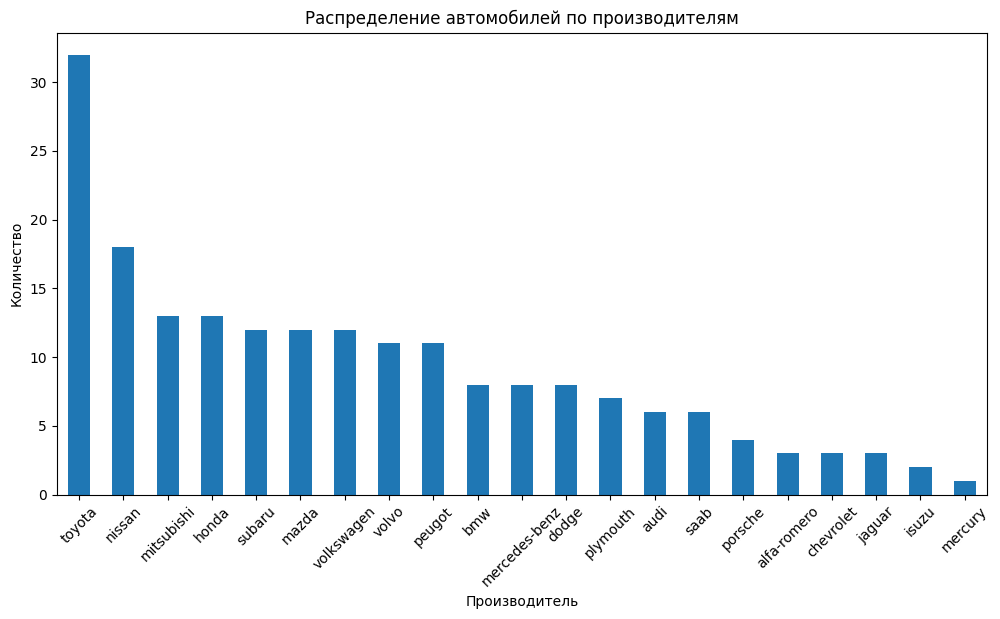

In [80]:
make_counts = df_processed['make'].value_counts()
print("Частота производителей:")
print(make_counts)

plt.figure(figsize=(12, 6))
make_counts.plot(kind='bar')
plt.title('Распределение автомобилей по производителям')
plt.xlabel('Производитель')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

#### 16. Выполните группировку набора данных одновременно по полям make и engine-type. Добавьте подсчет минимума, максимума и медианы по каждой группе.

In [81]:
grouped_data = df_processed.groupby(['make', 'engine-type']).agg({
    'price': ['min', 'max', 'median'],
    'horsepower': ['min', 'max', 'median'],
    'city-mpg': ['min', 'max', 'median']
})

print("Группировка по make и engine-type:")
grouped_data.head(10)

Группировка по make и engine-type:


price                   horsepower                \
                             min      max   median        min    max median   
make        engine-type                                                       
alfa-romero dohc         13495.0  16500.0  14997.5      111.0  111.0  111.0   
            ohcv         16500.0  16500.0  16500.0      154.0  154.0  154.0   
audi        ohc          13950.0  23875.0  17580.0      102.0  140.0  110.0   
bmw         ohc          16430.0  41315.0  22835.0      101.0  182.0  121.0   
chevrolet   l             5151.0   5151.0   5151.0       48.0   48.0   48.0   
            ohc           6295.0   6575.0   6435.0       70.0   70.0   70.0   
dodge       ohc           5572.0  12964.0   7150.5       68.0  145.0   68.0   
honda       ohc           5399.0  12945.0   7295.0       58.0  101.0   76.0   
isuzu       ohc           6785.0  11048.0   8916.5       78.0   90.0   84.0   
jaguar      dohc         32250.0  35550.0  33900.0      176.0  176.0  176.0   

                        city-mpg             
                             min max median  
make        engine-type                      
alfa-romero dohc              21  21   21.0  
            ohcv              19  19   19.0  
audi        ohc               17  24   19.0  
bmw         ohc               15  23   20.5  
chevrolet   l                 47  47   47.0  
            ohc               38  38   38.0  
dodge       ohc               19  37   31.0  
honda       ohc               24  49   30.0  
isuzu       ohc               24  24   24.0  
jaguar      dohc              15  15   15.0

#### 17. Постройте поле корреляции (тепловая карта) для числовых полей

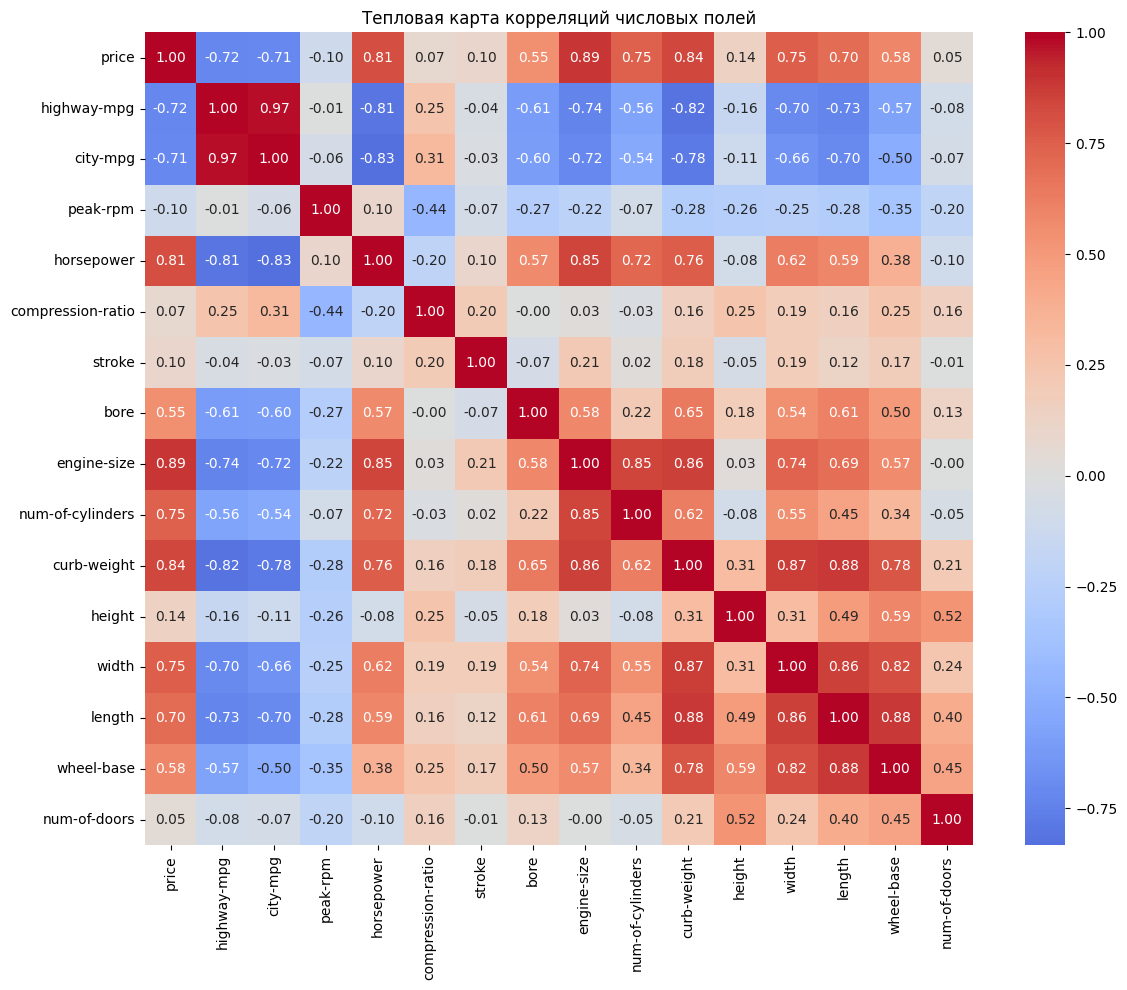

In [82]:
numeric_columns = df_processed.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 10))
correlation_matrix = df_processed[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Тепловая карта корреляций числовых полей')
plt.tight_layout()
plt.show()

#### 18. Постройте гистограмму по полю peak-rpm

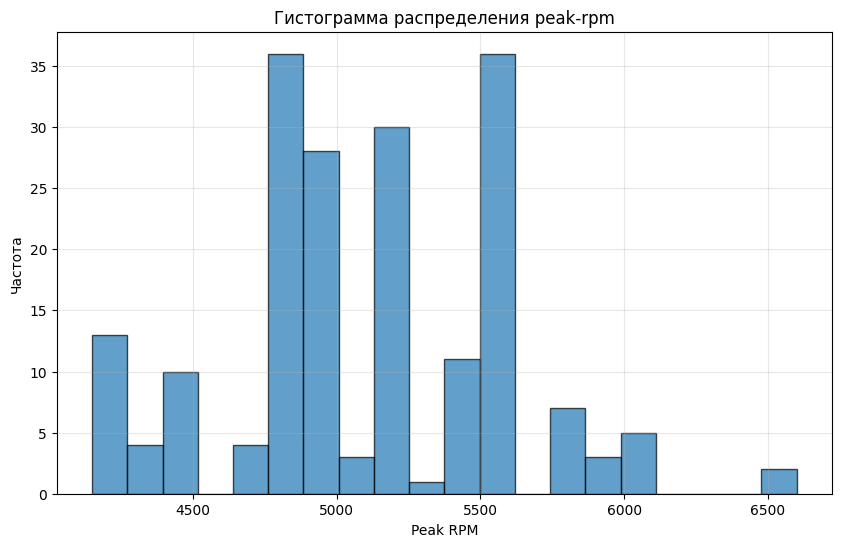

In [83]:
plt.figure(figsize=(10, 6))
plt.hist(df_processed['peak-rpm'].dropna(), bins=20, edgecolor='black', alpha=0.7)
plt.title('Гистограмма распределения peak-rpm')
plt.xlabel('Peak RPM')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)
plt.show()

#### 19. Постройте точечную диаграмму для полей stroke и peak-rpm

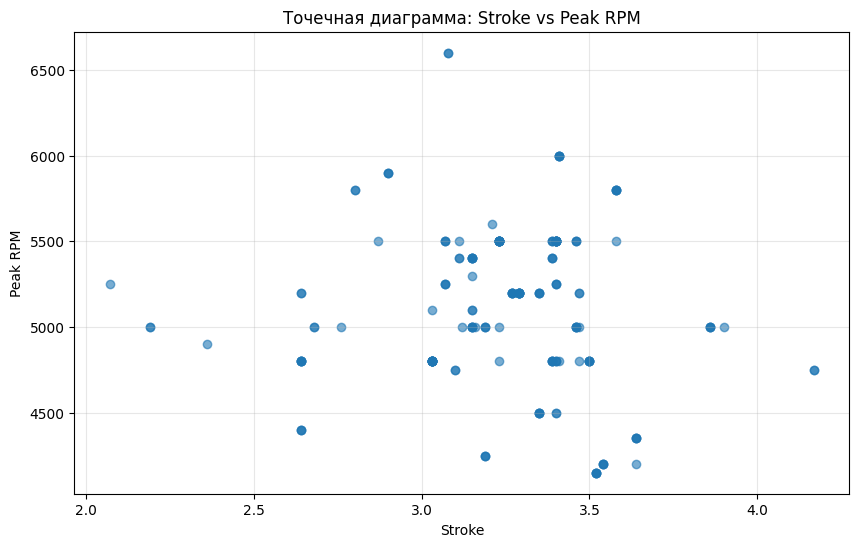

In [84]:
plt.figure(figsize=(10, 6))
plt.scatter(df_processed['stroke'], df_processed['peak-rpm'], alpha=0.6)
plt.title('Точечная диаграмма: Stroke vs Peak RPM')
plt.xlabel('Stroke')
plt.ylabel('Peak RPM')
plt.grid(True, alpha=0.3)
plt.show()

#### 20. Постройте диаграмму ящик с усами поля stroke

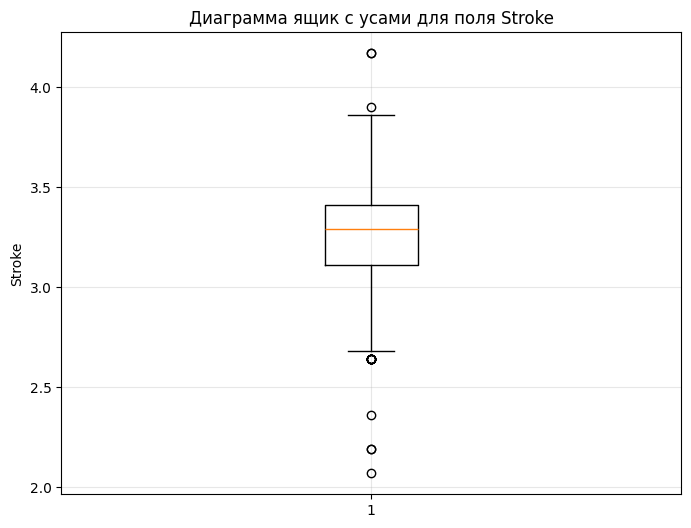

Количество выбросов в поле stroke: 18
Выбросы: [3.9, 4.17, 4.17, 2.19, 2.19, 2.07, 2.36, 2.64, 2.64, 2.64, 2.64, 2.64, 2.64, 2.64, 2.64, 2.64, 2.64, 2.64]


In [85]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_processed['stroke'].dropna())
plt.title('Диаграмма ящик с усами для поля Stroke')
plt.ylabel('Stroke')
plt.grid(True, alpha=0.3)
plt.show()

stroke_data = df_processed['stroke']
Q1 = stroke_data.quantile(0.25)
Q3 = stroke_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = stroke_data[(stroke_data < lower_bound) | (stroke_data > upper_bound)]
print(f"Количество выбросов в поле stroke: {len(outliers)}")
print(f"Выбросы: {outliers.tolist()}")

#### 21. Постройте матрицу диаграммы рассеяния

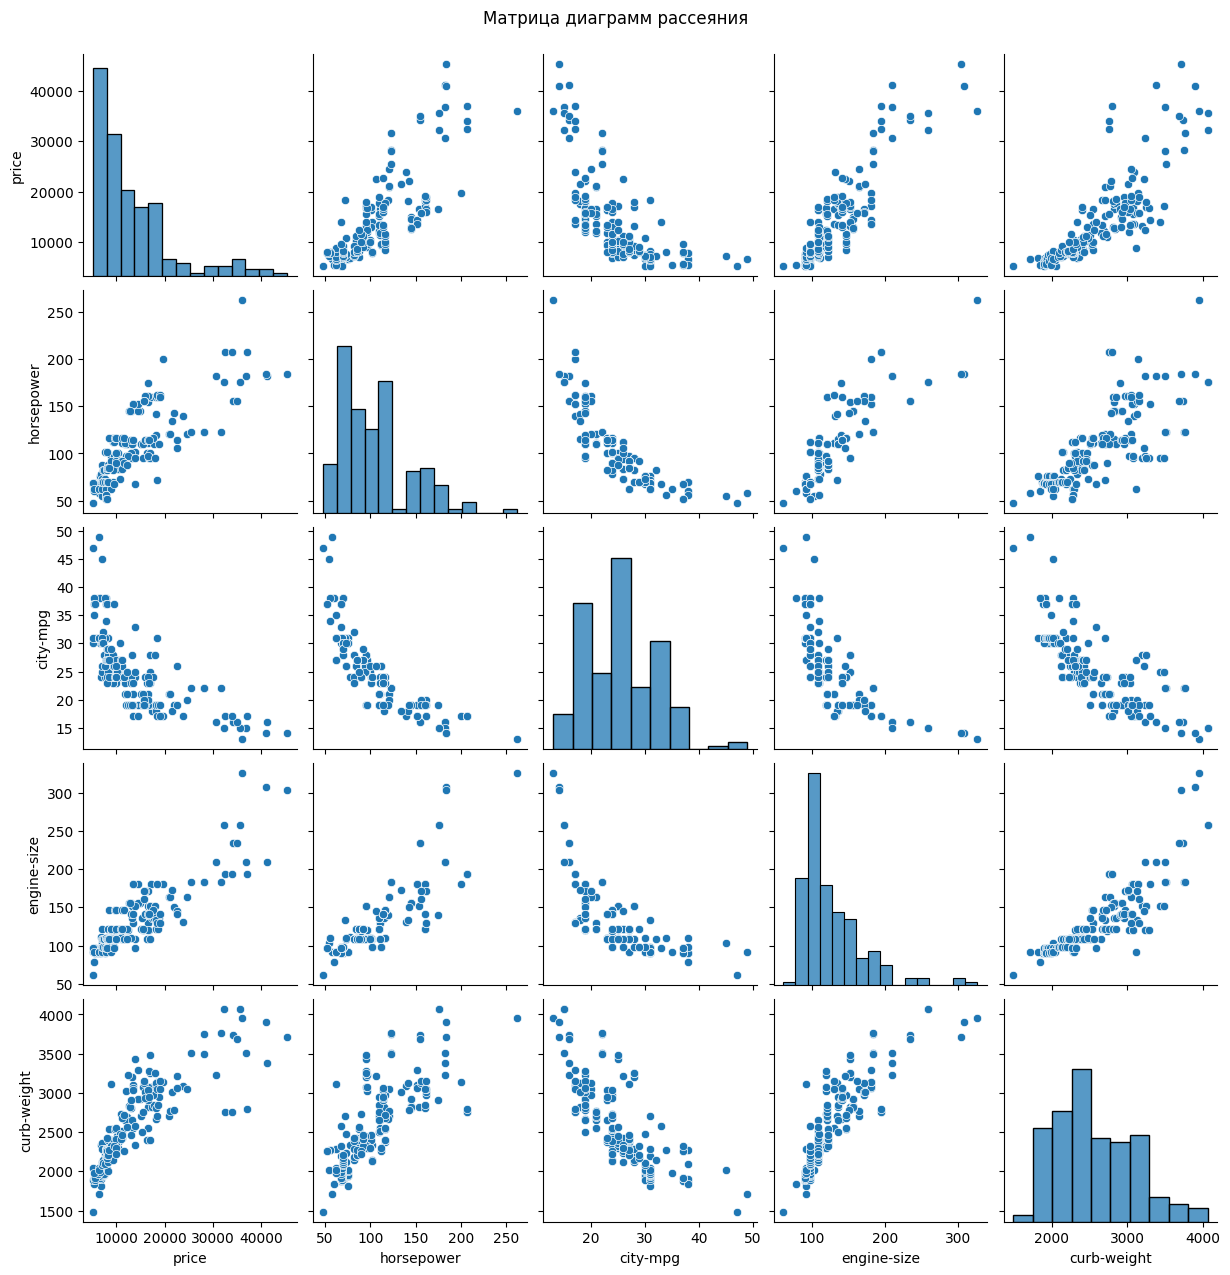

In [86]:
selected_columns = ['price', 'horsepower', 'city-mpg', 'engine-size', 'curb-weight']
sns.pairplot(df_processed[selected_columns].dropna())
plt.suptitle('Матрица диаграмм рассеяния', y=1.02)
plt.show()

#### 22. Удалите поля, которые будут неинформативны для построения модели машинного обучения. Оставьте такое количество полей, которое будет для вас удобным при построении модели машинного обучения

In [87]:
columns_to_drop = ['symboling', 'normalized-losses']

existing_columns_to_drop = [col for col in columns_to_drop if col in df_processed.columns]
df_ml = df_processed.drop(columns=existing_columns_to_drop)

print(f"Размер данных после удаления неинформативных полей: {df_ml.shape}")
print(f"Удаленные поля: {existing_columns_to_drop}")

Размер данных после удаления неинформативных полей: (193, 24)
Удаленные поля: []


#### 23. Преобразуйте все категориальные поля в числовые с помощью LabelEncoder

In [88]:
df_encoded = df_ml.copy()
label_encoders = {}

categorical_columns = df_encoded.select_dtypes(include=['object']).columns

for column in categorical_columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column].astype(str))
    label_encoders[column] = le
    print(f"Закодировано поле: {column}")

print(f"\nРазмер данных после кодирования: {df_encoded.shape}")
print("Пример закодированных данных:")
df_encoded.head()

Закодировано поле: fuel-system
Закодировано поле: engine-type
Закодировано поле: engine-location
Закодировано поле: drive-wheels
Закодировано поле: body-style
Закодировано поле: aspiration
Закодировано поле: fuel-type
Закодировано поле: make

Размер данных после кодирования: (193, 24)
Пример закодированных данных:


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,width,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,4,130,...,64.1,168.8,88.6,0,2,0,2.0,0,1,0
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,4,130,...,64.1,168.8,88.6,0,2,0,2.0,0,1,0
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,4,152,...,65.5,171.2,94.5,0,2,2,2.0,0,1,0
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,4,109,...,66.2,176.6,99.8,0,1,3,4.0,0,1,1
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,4,136,...,66.4,176.6,99.4,0,0,3,4.0,0,1,1


#### 24. Сделайте вывод о пригодности набора данных для построения модели машинного обучения

ВЫВОД О ПРИГОДНОСТИ НАБОРА ДАННЫХ:
==================================================
1. Качество данных:
   - Исходный размер: (205, 24)
   - После очистки: (193, 24)
   - Потеря данных: 5.9%

2. Типы данных:
   - Числовые поля: 24
   - Все категориальные поля преобразованы в числовые

3. Пропуски в данных:
   - Общее количество пропусков: 0

4. Целевая переменная:
   - Название: price
   - Тип: числовой (регрессия)

5. ЗАКЛЮЧЕНИЕ: Набор данных ПРИГОДЕН для построения моделей машинного обучения
   - Данные очищены от пропусков
   - Все признаки преобразованы в числовой формат
   - Имеется достаточное количество наблюдений
   - Целевая переменная четко определена

# Часть II. Построение модели машинного обучения для набора данных: Автомобили

## Задание

Вам нужно решить задачу регресии с помощью алгоритма

Линейная регрессия LinearRegression



Целевая переменная, результат: **price**

#### 25. Разделить выборку на признаки (Х) и результат (Y)

In [89]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

print(f"Признаки (X): {X.shape}")
print(f"Целевая переменная (y): {y.shape}")
print(f"Количество признаков: {X.shape[1]}")

Признаки (X): (193, 23)
Целевая переменная (y): (193,)
Количество признаков: 23


#### 26. Разделить на обучающую и тестовую выборки

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")
print(f"Размер тестовой выборки: {len(X_test)} записей ({len(X_test)/len(X)*100:.1f}%)")

Обучающая выборка: (154, 23)
Тестовая выборка: (39, 23)
Размер тестовой выборки: 39 записей (20.2%)


#### 27. Сформировать модель машинного обучения

In [91]:
linear_model = LinearRegression()
print("Модель линейной регрессии создана")

Модель линейной регрессии создана


#### 28. Обучить модель

In [92]:
linear_model.fit(X_train, y_train)
print("Модель линейной регрессии обучена")
print(f"Количество коэффициентов: {len(linear_model.coef_)}")

Модель линейной регрессии обучена
Количество коэффициентов: 23


#### 29. Оценить качество модели

ОЦЕНКА КАЧЕСТВА МОДЕЛИ ЛИНЕЙНОЙ РЕГРЕССИИ:
Среднеквадратичная ошибка (MSE): 17407102.91
Корень из MSE (RMSE): 4172.18
Коэффициент детерминации (R²): 0.8451


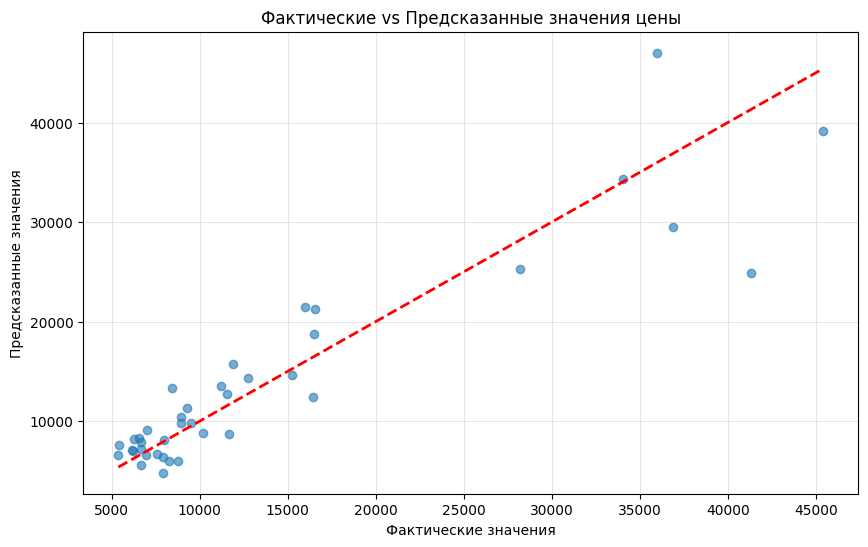

In [93]:
y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("ОЦЕНКА КАЧЕСТВА МОДЕЛИ ЛИНЕЙНОЙ РЕГРЕССИИ:")
print("="*40)
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Корень из MSE (RMSE): {rmse:.2f}")
print(f"Коэффициент детерминации (R²): {r2:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические vs Предсказанные значения цены')
plt.grid(True, alpha=0.3)
plt.show()

#### 30. Выполнить предсказание для трех фраз

In [94]:
sample_indices = X_test.sample(3).index
sample_features = X_test.loc[sample_indices]
sample_actual = y_test.loc[sample_indices]

sample_predictions = linear_model.predict(sample_features)

print("ПРЕДСКАЗАНИЯ ДЛЯ ТРЕХ СЛУЧАЙНЫХ АВТОМОБИЛЕЙ:")
print("="*50)
for i, (idx, actual, pred) in enumerate(zip(sample_indices, sample_actual, sample_predictions)):
    print(f"Автомобиль {i+1}:")
    print(f"  Фактическая цена: ${actual:,.2f}")
    print(f"  Предсказанная цена: ${pred:,.2f}")
    print(f"  Ошибка: ${abs(actual - pred):,.2f}")
    print(f"  Относительная ошибка: {abs(actual - pred)/actual*100:.1f}%")
    print()

ПРЕДСКАЗАНИЯ ДЛЯ ТРЕХ СЛУЧАЙНЫХ АВТОМОБИЛЕЙ:
Автомобиль 1:
  Фактическая цена: $11,900.00
  Предсказанная цена: $15,764.96
  Ошибка: $3,864.96
  Относительная ошибка: 32.5%

Автомобиль 2:
  Фактическая цена: $45,400.00
  Предсказанная цена: $39,160.46
  Ошибка: $6,239.54
  Относительная ошибка: 13.7%

Автомобиль 3:
  Фактическая цена: $41,315.00
  Предсказанная цена: $24,929.60
  Ошибка: $16,385.40
  Относительная ошибка: 39.7%



#### 31. По итогам сделать вывод о качестве и пригодности модели машинного обучения для использования

ВЫВОД О КАЧЕСТВЕ И ПРИГОДНОСТИ МОДЕЛИ:
==================================================
1. МЕТРИКИ КАЧЕСТВА:
   - R² = 0.8451
   - RMSE = 4172.18

2. ИНТЕРПРЕТАЦИЯ R²:
   - ХОРОШЕЕ качество (0.7 ≤ R² < 0.9)

3. ПРАКТИЧЕСКАЯ ПРИМЕНИМОСТЬ:
   - Модель МОЖЕТ быть использована для прогнозирования цен
   - Точность достаточна для практического применения

4. РЕКОМЕНДАЦИИ:
   - Модель объясняет значительную часть дисперсии цен
   - Можно использовать для первоначальной оценки автомобилей
   - Для повышения точности рекомендуется:
     * Собрать больше данных
     * Добавить дополнительные признаки
     * Попробовать более сложные алгоритмы


#### 32. Постройте еще одну модель машинного обучения, сравните той, что была в задании и сделайте вывод о том, какая модель лучше

СРАВНЕНИЕ МОДЕЛЕЙ:
LinearRegression:
  R²: 0.8451
  RMSE: 4172.18

RandomForestRegressor:
  R²: 0.9344
  RMSE: 2715.36

СРАВНЕНИЕ:
  RandomForestRegressor ЛУЧШЕ на 10.6% по R²

ВЫВОД: RandomForestRegressor показывает лучшее качество на данном наборе данных


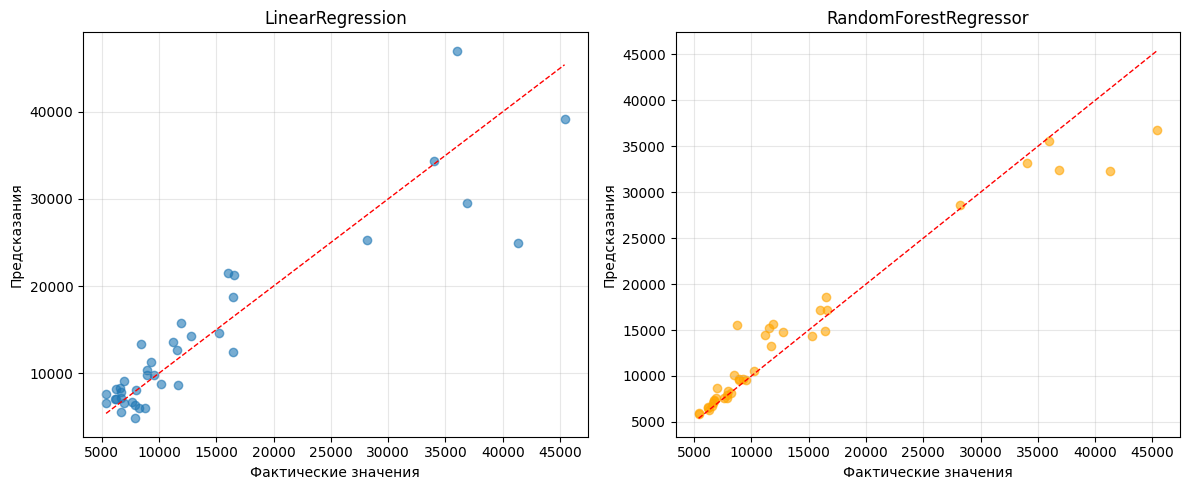

In [95]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("СРАВНЕНИЕ МОДЕЛЕЙ:")
print("="*40)
print("LinearRegression:")
print(f"  R²: {r2:.4f}")
print(f"  RMSE: {rmse:.2f}")

print("\nRandomForestRegressor:")
print(f"  R²: {r2_rf:.4f}")
print(f"  RMSE: {rmse_rf:.2f}")

print("\nСРАВНЕНИЕ:")
if r2_rf > r2:
    improvement = ((r2_rf - r2) / r2) * 100
    print(f"  RandomForestRegressor ЛУЧШЕ на {improvement:.1f}% по R²")
    best_model = "RandomForestRegressor"
else:
    improvement = ((r2 - r2_rf) / r2_rf) * 100
    print(f"  LinearRegression: ЛУЧШЕ на {improvement:.1f}% по R²")
    best_model = "LinearRegression"

print(f"\nВЫВОД: {best_model} показывает лучшее качество на данном наборе данных")

# Визуализация сравнения моделей
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6, label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказания')
plt.title('LinearRegression')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Random Forest', color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказания')
plt.title('RandomForestRegressor')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()